# Banknote Authentication using TensorFlow & Scikit-learn

### Aim

Detect forged banknotes based on data (extracted from images) from genuine and forged banknote-like specimens using different classification methods.

### Dataset

[Bank Authentication Dataset from the UCI Repository](https://archive.ics.uci.edu/ml/datasets/banknote+authentication)


Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

### Information about the dataset

1. **Image.Var:** Variance of Wavelet Transformed image (WTI) (continuous) 
2. **Image.Skew:** Skewness of WTI (continuous) 
3. **Image.Curt:** Curtosis of WTI (continuous) 
4. **Entropy:** Entropy of image (continuous) 
5. **Class:** Whether or not the banknote was authentic (integer)

## Imports

In [1]:
# Import libraries
import warnings 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

import tensorflow.contrib.learn as tflearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

warnings.filterwarnings('ignore')
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.style.use('fivethirtyeight')

In [3]:
# Import dataset
bank_notes = pd.read_csv('/Users/TracyShields/Desktop/bank_note_data.csv')

In [4]:
bank_notes.shape

(1372, 5)

In [5]:
bank_notes.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
bank_notes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
Image.Var     1372 non-null float64
Image.Skew    1372 non-null float64
Image.Curt    1372 non-null float64
Entropy       1372 non-null float64
Class         1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [7]:
bank_notes.describe()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


## Exploratory data analysis

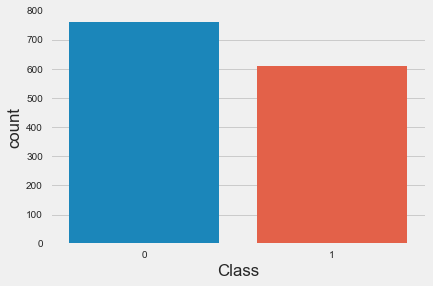

In [8]:
sns.countplot(x='Class', data=bank_notes)
#plt.savefig('countplot', dpi=300)

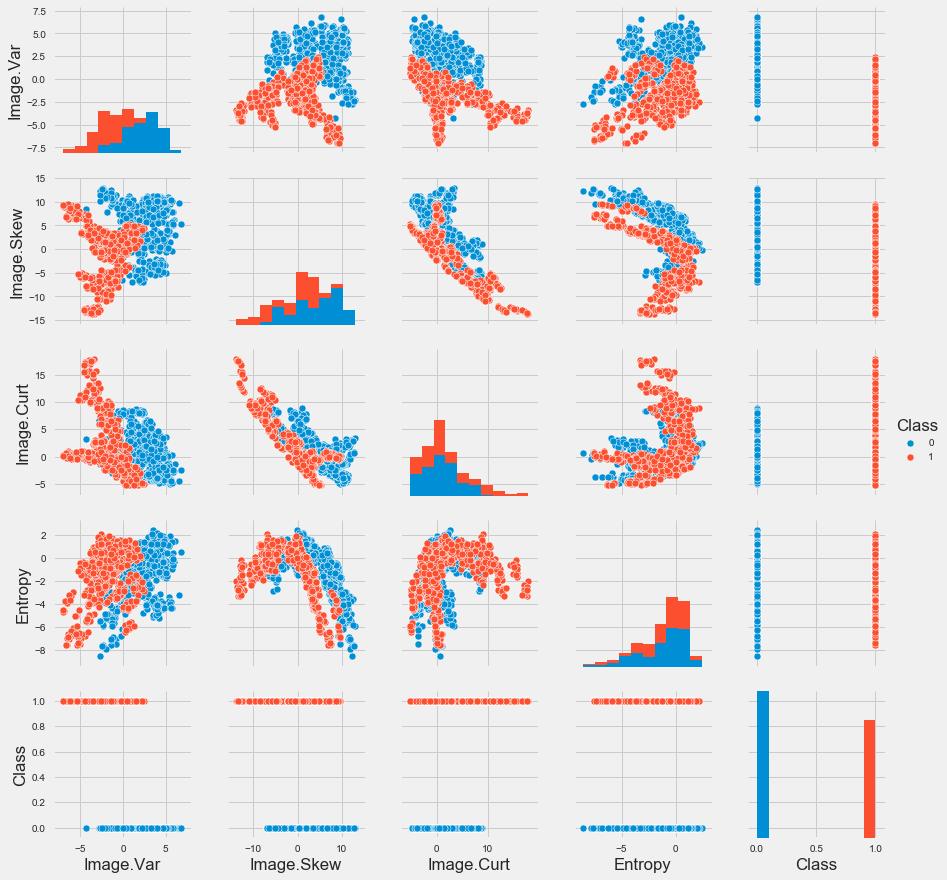

In [9]:
sns.pairplot(data=bank_notes, hue='Class')
#plt.savefig('pairplot', dpi=300)

## Preprocess Data

In [10]:
# Create a new dataframe with 'Class' removed
bank_notes_without_class = bank_notes.drop('Class', axis=1)

# Fit scaler
scaler = StandardScaler()
scaler.fit(bank_notes_without_class)

# Store scaled features as a separate dataframe
scaled_features = pd.DataFrame(data=scaler.transform(bank_notes_without_class), columns=bank_notes_without_class.columns)
scaled_features.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


## Train-test split

First, separate authentic and forged classes.

Create **X** (Pandas Dataframe) and **y** (Pandas Series) and transform them into Numpy arrays.

In [11]:
X = scaled_features
y = bank_notes['Class']

X = X.as_matrix()
y = y.as_matrix()

Split data into training and test set, with test size being **20%**.

In [12]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Shapes
print("TRAINING SET SHAPES")
print("X_train :", X_train.shape)
print("y_train :", y_train.shape)
print()
print("TEST SET SHAPES")
print("X_test :", X_test.shape)
print("y_test :", y_test.shape)

TRAINING SET SHAPES
X_train : (1097, 4)
y_train : (1097,)

TEST SET SHAPES
X_test : (275, 4)
y_test : (275,)


In [13]:
feature_columns = tflearn.infer_real_valued_columns_from_input(X_train)

## Tensorflow DNN Classifier

In [14]:
DNN = tflearn.DNNClassifier(hidden_units=[10,20,10], 
                            feature_columns=feature_columns,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11ddbc860>, '_master': '', '_num_ps_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000}


In [15]:
DNN.fit(X_train, y_train, steps=200, batch_size=20)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scal

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x11d7720f0>, 'hidden_units': [10, 20, 10], 'feature_columns': (_RealValuedColumn(column_name='', dimension=4, default_value=None, dtype=tf.float64, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x117a90e18>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

In [16]:
DNN_predictions = list(DNN.predict(X_test))

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))


In [18]:
print(classification_report(y_test, DNN_predictions))

             precision    recall  f1-score   support

          0       0.99      0.98      0.99       148
          1       0.98      0.99      0.98       127

avg / total       0.99      0.99      0.99       275



## Random Forest

In [19]:
rfc = RandomForestClassifier(n_estimators=200)

In [20]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [21]:
rfc_predictions = rfc.predict(X_test)

In [22]:
print(classification_report(y_test, rfc_predictions))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99       148
          1       1.00      0.98      0.99       127

avg / total       0.99      0.99      0.99       275



## Logistic Regression

In [23]:
lr = LogisticRegression()

In [24]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
lr_preds = lr.predict(X_test)

In [26]:
print(classification_report(y_test, lr_preds))

             precision    recall  f1-score   support

          0       0.99      0.97      0.98       148
          1       0.97      0.98      0.98       127

avg / total       0.98      0.98      0.98       275



## Conclusion

The DNN and Random Forest models performed similaryly well withouth any hardcore hyperparameter tuning. The Logistic Regression model also did well without tuning.